# Fashion Semantic Space Analysis
# 时尚语义空间分析

**Enhanced with:**
- 三层词汇过滤（停用词 → 噪声词 → 风格词）
- 风格专属度权重
- 词性权重（动态调整）

---

## 1. 导入库和初始化

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 导入核心模块
from core import *
from visualization import *

print("✓ Modules loaded successfully")

✓ Modules loaded successfully


In [2]:
# 初始化配置
config = init_config('./config/word_filters.json')

# 查看配置摘要
print(f"\nStopwords: {len(config['stopwords'])} words")
print(f"Noise words: {len(config['noise_words'])} words")
print(f"Style word categories: {list(config['style_words'].keys())}")
print(f"POS weight modes: static + dynamic ({len(config['pos_weights']['dynamic'])} styles)")

✓ Configuration loaded from ./config/word_filters.json

Stopwords: 116 words
Noise words: 50 words
Style word categories: ['materials', 'elements', 'fits', 'designs', 'details']
POS weight modes: static + dynamic (8 styles)


## 2. 加载数据

In [3]:
# 加载时尚数据
details_df, reviews_df = load_fashion_data('./AmazonFashionProduct')

# 查看数据样例
if not details_df.empty:
    print("\n=== Sample Details Data ===")
    print(details_df.head(3))

if not reviews_df.empty:
    print("\n=== Sample Reviews Data ===")
    print(reviews_df.head(3))


=== Data Loading Summary ===
Total detail records: 98118
Total review records: 1136787
Styles in details: ['Y2K_Aesthetic', 'athleisure', 'bohemian_fashion', 'casual', 'college', 'cute', 'formal', 'gothic', 'luxury', 'minimalist', 'punk', 'retro', 'romantic', 'streetwear', 'workwear']
Styles in reviews: ['Y2K_Aesthetic', 'athleisure', 'bohemian_fashion', 'casual', 'college', 'cute', 'formal', 'gothic', 'luxury', 'minimalist', 'punk', 'retro', 'romantic', 'streetwear', 'workwear']

=== Sample Details Data ===
                                                  标题  \
0  MAGCOMSEN Women's UPF 50+ Lightweight Athletic...   
1  MAGCOMSEN Women's UPF 50+ Lightweight Athletic...   
2  MAGCOMSEN Women's UPF 50+ Lightweight Athletic...   

                                                  详情       style   source  \
0  UV PROTECTION: UPF 50+ fabric for maximum prot...  athleisure  details   
1  BREATHABLE & LIGHTWEIGHT: High density mesh fa...  athleisure  details   
2  STAND UP COLLAR & THUMB HO

## 3. 提取风格词汇（三层过滤 + 词性标注）

In [4]:
# 设置严格模式
# strict_mode=False: 宽松模式，保留所有通过噪声过滤的词
# strict_mode=True: 严格模式，只保留在风格词典中的词
STRICT_MODE = False

print(f"Extracting style words (strict_mode={STRICT_MODE})...")
style_words, style_words_pos = extract_style_words(details_df, reviews_df, strict_mode=STRICT_MODE)

# 显示统计信息
show_data_statistics(style_words)

Extracting style words (strict_mode=False)...

Processing details data...
  Processed 98118 detail records

Processing reviews data...
  Processed 1136787 review records

=== Style Words Statistics ===

Y2K_Aesthetic:
  Total words: 588,573
  Unique words: 9,468
  Top 10 words:
    - cute: 9405
    - size: 9061
    - fit: 8346
    - shirt: 7991
    - material: 7700
    - quality: 7123
    - wear: 5518
    - small: 5291
    - top: 5188
    - soft: 4813

athleisure:
  Total words: 1,489,069
  Unique words: 11,877
  Top 10 words:
    - fit: 25825
    - size: 23440
    - comfortable: 20719
    - wear: 18466
    - material: 17764
    - soft: 15985
    - color: 15464
    - more: 14504
    - top: 14016
    - pants: 12852

bohemian_fashion:
  Total words: 1,241,315
  Unique words: 12,834
  Top 10 words:
    - dress: 22412
    - size: 20404
    - fit: 17783
    - wear: 15841
    - material: 14603
    - comfortable: 14130
    - fabric: 13171
    - color: 12426
    - shirt: 12162
    - cute: 1173

In [5]:
# 查看某个风格的词性分布
if style_words_pos:
    sample_style = list(style_words_pos.keys())[0]
    pos_dist = {}
    for word, pos in style_words_pos[sample_style].items():
        pos_dist[pos] = pos_dist.get(pos, 0) + 1
    
    print(f"\n=== POS Distribution for '{sample_style}' ===")
    for pos, count in sorted(pos_dist.items(), key=lambda x: x[1], reverse=True):
        print(f"  {pos}: {count}")


=== POS Distribution for 'athleisure' ===
  NOUN: 4868
  VERB: 2518
  ADJ: 1679
  PROPN: 1630
  ADV: 576
  ADP: 58
  AUX: 38
  PRON: 31
  SCONJ: 20
  NUM: 16
  DET: 12
  X: 12
  INTJ: 8
  CCONJ: 8
  PUNCT: 1


## 4. 增强版特征提取（TF-IDF × 专属度 × 词性）

In [6]:
# 提取增强特征
style_features, feature_details = extract_enhanced_features(
    style_words, 
    style_words_pos, 
    max_features=200, 
    min_df=2
)

# 显示增强特征（包含权重分解）
show_enhanced_features(style_features, feature_details, top_n=15)


Extracting enhanced features from 15 styles...
Computing style specificity...
Computing final weighted features...
✓ Enhanced features extracted for 15 styles

=== Enhanced Features by Style ===

Y2K_Aesthetic:
   1. fairy                     | TF-IDF: 0.404 × Spec: 0.367 × POS: 1.20 = 0.1781
   2. harajuku                  | TF-IDF: 0.328 × Spec: 0.435 × POS: 1.20 = 0.1712
   3. gothic                    | TF-IDF: 0.324 × Spec: 0.319 × POS: 1.50 = 0.1549
   4. fairy grunge              | TF-IDF: 0.398 × Spec: 0.392 × POS: 0.85 = 0.1324
   5. goth                      | TF-IDF: 0.205 × Spec: 0.281 × POS: 1.50 = 0.0862
   6. baby tee                  | TF-IDF: 0.406 × Spec: 0.156 × POS: 1.20 = 0.0758
   7. cargo pants               | TF-IDF: 0.272 × Spec: 0.205 × POS: 1.20 = 0.0671
   8. lenses                    | TF-IDF: 0.118 × Spec: 0.444 × POS: 1.20 = 0.0627
   9. emo                       | TF-IDF: 0.153 × Spec: 0.338 × POS: 1.20 = 0.0619
  10. graphic tees              | TF-IDF:

In [7]:
# 对比某个词在不同风格中的权重
word_to_compare = 'elegant'  # 可以修改为任意词

print(f"\n=== Weights for '{word_to_compare}' across styles ===")
for style in sorted(feature_details.keys()):
    if word_to_compare in feature_details[style]:
        details = feature_details[style][word_to_compare]
        print(f"\n{style}:")
        print(f"  TF-IDF:      {details['tfidf']:.4f}")
        print(f"  Specificity: {details['specificity']:.4f}")
        print(f"  POS Weight:  {details['pos_weight']:.4f}")
        print(f"  Final:       {details['final']:.4f}")


=== Weights for 'elegant' across styles ===


## 5. 词嵌入构建

In [8]:
# 创建词嵌入
word_embeddings, vocab, vocab_index = create_word_embeddings(style_words, n_components=100)

# 测试词相似度
if word_embeddings:
    test_words = ['dress', 'casual', 'elegant', 'vintage', 'leather', 'cotton']
    
    print("\n=== Word Similarity Test ===")
    for word in test_words:
        if word in word_embeddings:
            # 找相似词
            word_vec = word_embeddings[word]
            similarities = []
            
            for other_word, other_vec in word_embeddings.items():
                if other_word != word:
                    sim = np.dot(word_vec, other_vec)
                    similarities.append((other_word, sim))
            
            similarities.sort(key=lambda x: x[1], reverse=True)
            
            print(f"\nWords similar to '{word}':")
            for w, score in similarities[:5]:
                print(f"  {w}: {score:.3f}")


Creating word embeddings...
✓ Created embeddings for 47226 words with 100 dimensions

=== Word Similarity Test ===

Words similar to 'dress':
  beautiful: 0.848
  dresses: 0.799
  wedding: 0.787
  compliments: 0.779
  perfectly: 0.775

Words similar to 'casual':
  occasion: 0.868
  occasions: 0.867
  office: 0.863
  suitable: 0.843
  versatile: 0.834

Words similar to 'elegant':
  stunning: 0.872
  touch: 0.850
  elegance: 0.845
  classy: 0.842
  sophisticated: 0.830

Words similar to 'vintage':
  retro: 0.891
  women: 0.855
  trendy: 0.848
  aesthetic: 0.846
  fashion: 0.846

Words similar to 'leather':
  faux: 0.884
  genuine: 0.781
  vegan: 0.772
  cites: 0.741
  suede: 0.725

Words similar to 'cotton':
  polyester: 0.969
  spandex: 0.902
  rayon: 0.888
  poly: 0.871
  viscose: 0.850


## 6. 风格向量构建

In [9]:
# 计算风格向量
style_vectors = compute_style_vectors(word_embeddings, style_features)

# 验证风格向量
if style_vectors:
    print("\n=== Style Vector Validation ===")
    for style, vector in sorted(style_vectors.items()):
        norm = np.linalg.norm(vector)
        non_zero = np.count_nonzero(vector)
        print(f"{style:20s}: norm={norm:.3f}, non-zero={non_zero}/{len(vector)}")


Computing style vectors...
✓ Generated 15 style vectors

=== Style Vector Validation ===
Y2K_Aesthetic       : norm=0.741, non-zero=100/100
athleisure          : norm=0.740, non-zero=100/100
bohemian_fashion    : norm=0.742, non-zero=100/100
casual              : norm=0.629, non-zero=100/100
college             : norm=0.906, non-zero=100/100
cute                : norm=0.678, non-zero=100/100
formal              : norm=0.748, non-zero=100/100
gothic              : norm=0.827, non-zero=100/100
luxury              : norm=0.624, non-zero=100/100
minimalist          : norm=0.769, non-zero=100/100
punk                : norm=0.761, non-zero=100/100
retro               : norm=0.776, non-zero=100/100
romantic            : norm=0.772, non-zero=100/100
streetwear          : norm=0.726, non-zero=100/100
workwear            : norm=0.800, non-zero=100/100


## 7. 相似度分析

In [10]:
# 计算相似度矩阵
similarity_df = compute_similarity_matrix(style_vectors)

# 查看相似度矩阵
if not similarity_df.empty:
    print("\n=== Similarity Matrix ===")
    print(similarity_df)
    
    # 找出风格关系
    find_style_relationships(similarity_df, top_n=3)


Computing similarity matrix...
✓ Similarity matrix computed for 15 styles

=== Similarity Matrix ===
                  Y2K_Aesthetic  athleisure  bohemian_fashion    casual  \
Y2K_Aesthetic          1.000000    0.473783          0.664936  0.456672   
athleisure             0.473783    1.000000          0.469091  0.807588   
bohemian_fashion       0.664936    0.469091          1.000000  0.494348   
casual                 0.456672    0.807588          0.494348  1.000000   
college                0.268758    0.310169          0.213997  0.339260   
cute                   0.587063    0.937476          0.605319  0.847298   
formal                 0.465592    0.468280          0.865255  0.558739   
gothic                 0.725653    0.328182          0.698912  0.373600   
luxury                 0.365901    0.621890          0.497294  0.769043   
minimalist             0.245925    0.453299          0.249304  0.763964   
punk                   0.763645    0.421169          0.651659  0.479810  

## 8. 可视化分析

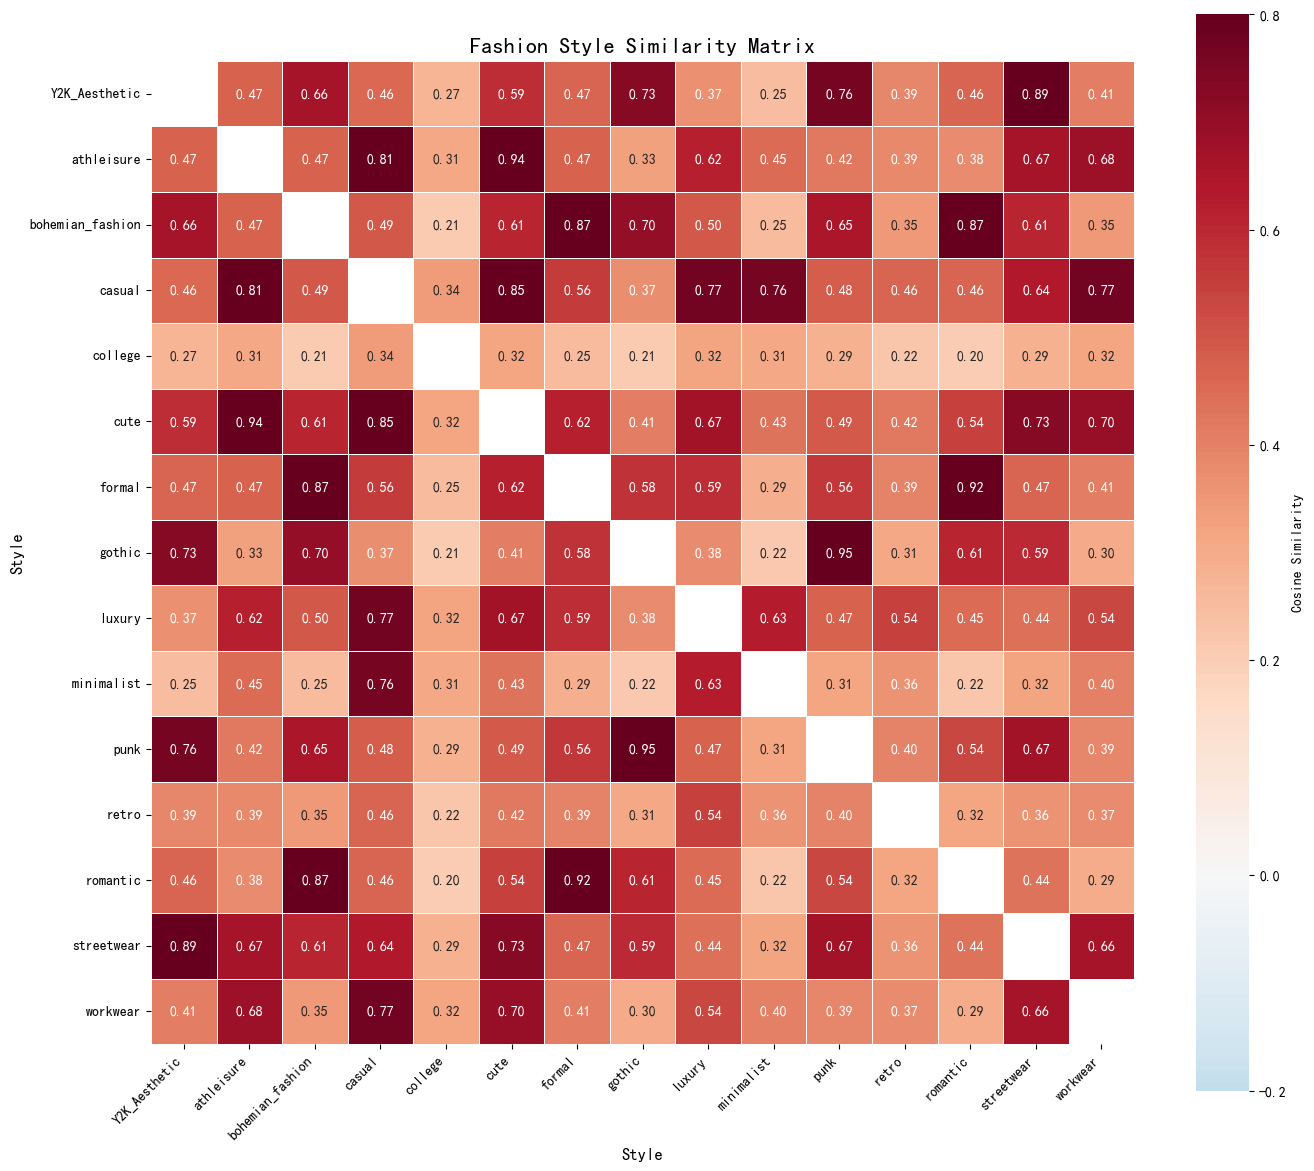

In [11]:
# 8.1 相似度热力图
if not similarity_df.empty:
    plot_similarity_heatmap(similarity_df)

Explained variance: PC1=0.278, PC2=0.166


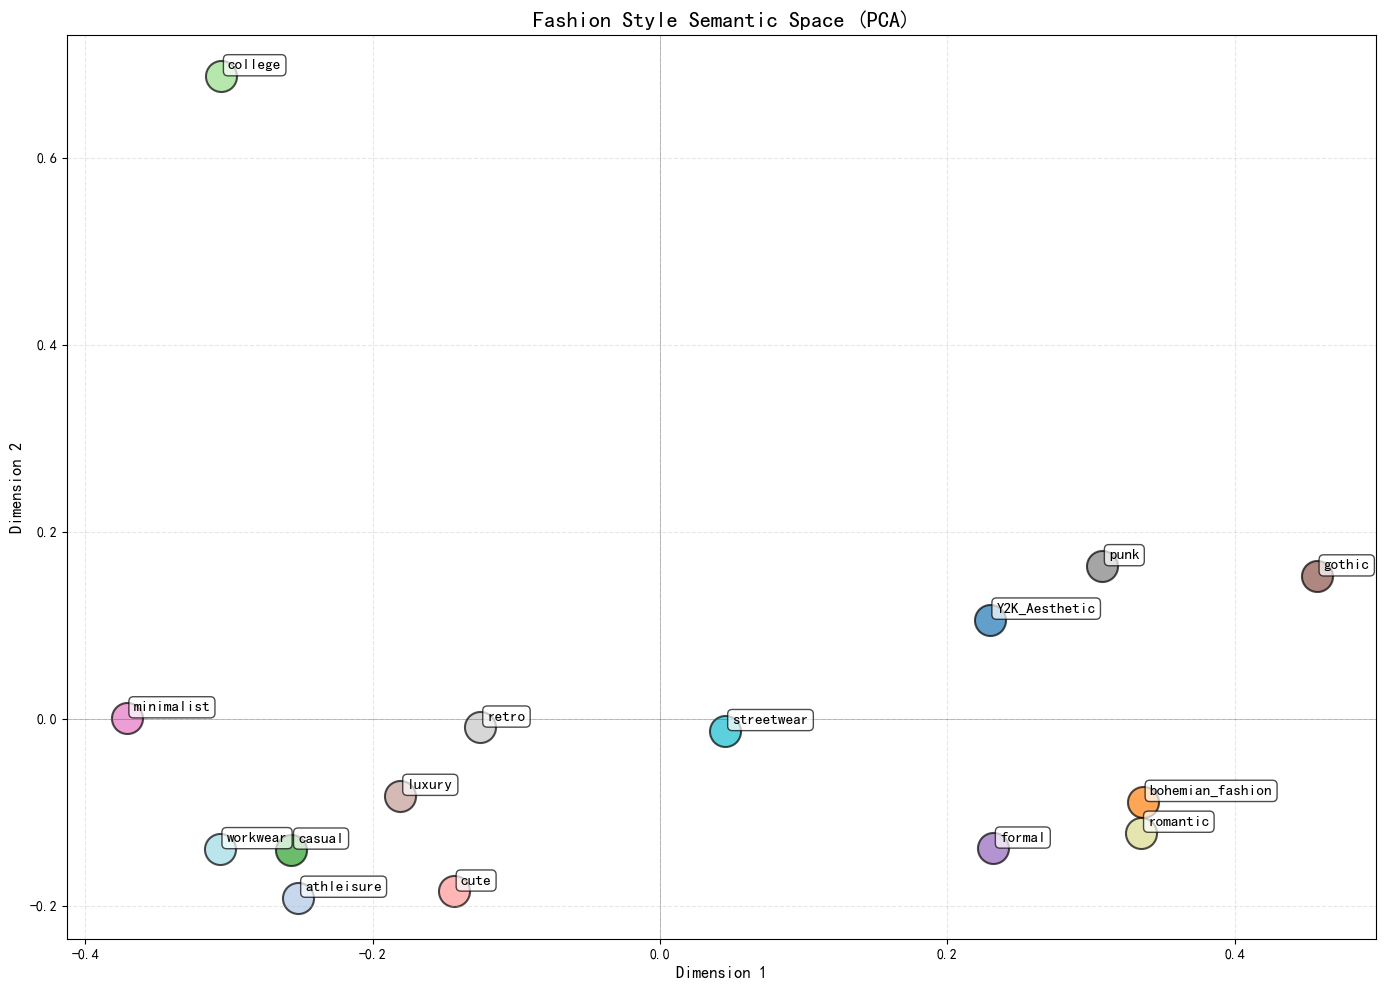

In [12]:
# 8.2 语义空间可视化 (PCA)
if style_vectors:
    visualize_style_space(style_vectors, method='pca')

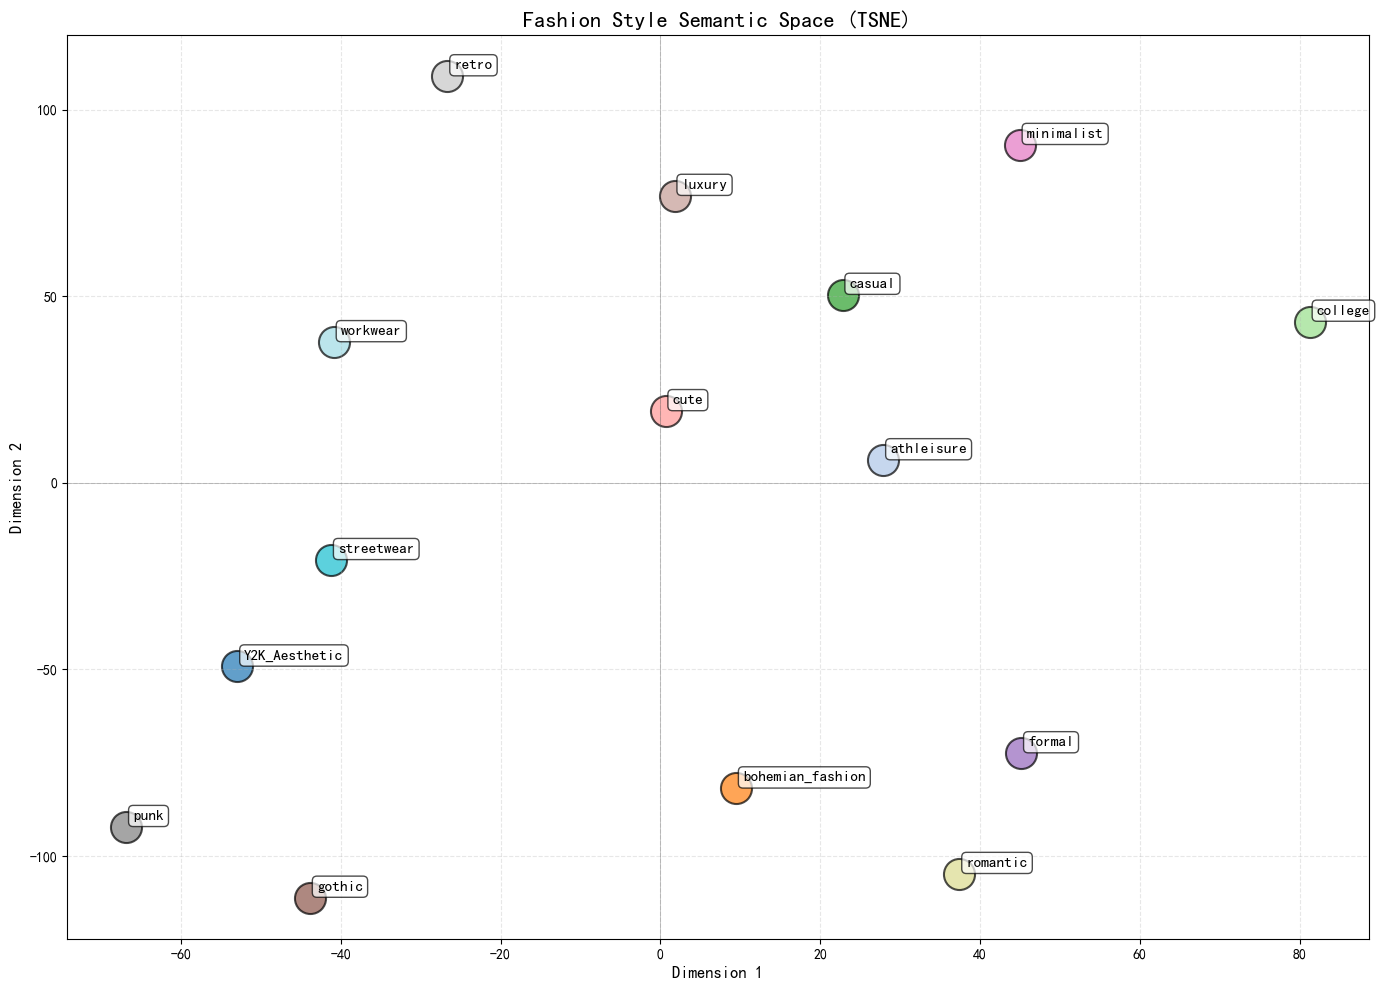

In [13]:
# 8.3 语义空间可视化 (t-SNE)
if style_vectors and len(style_vectors) >= 5:
    visualize_style_space(style_vectors, method='tsne')

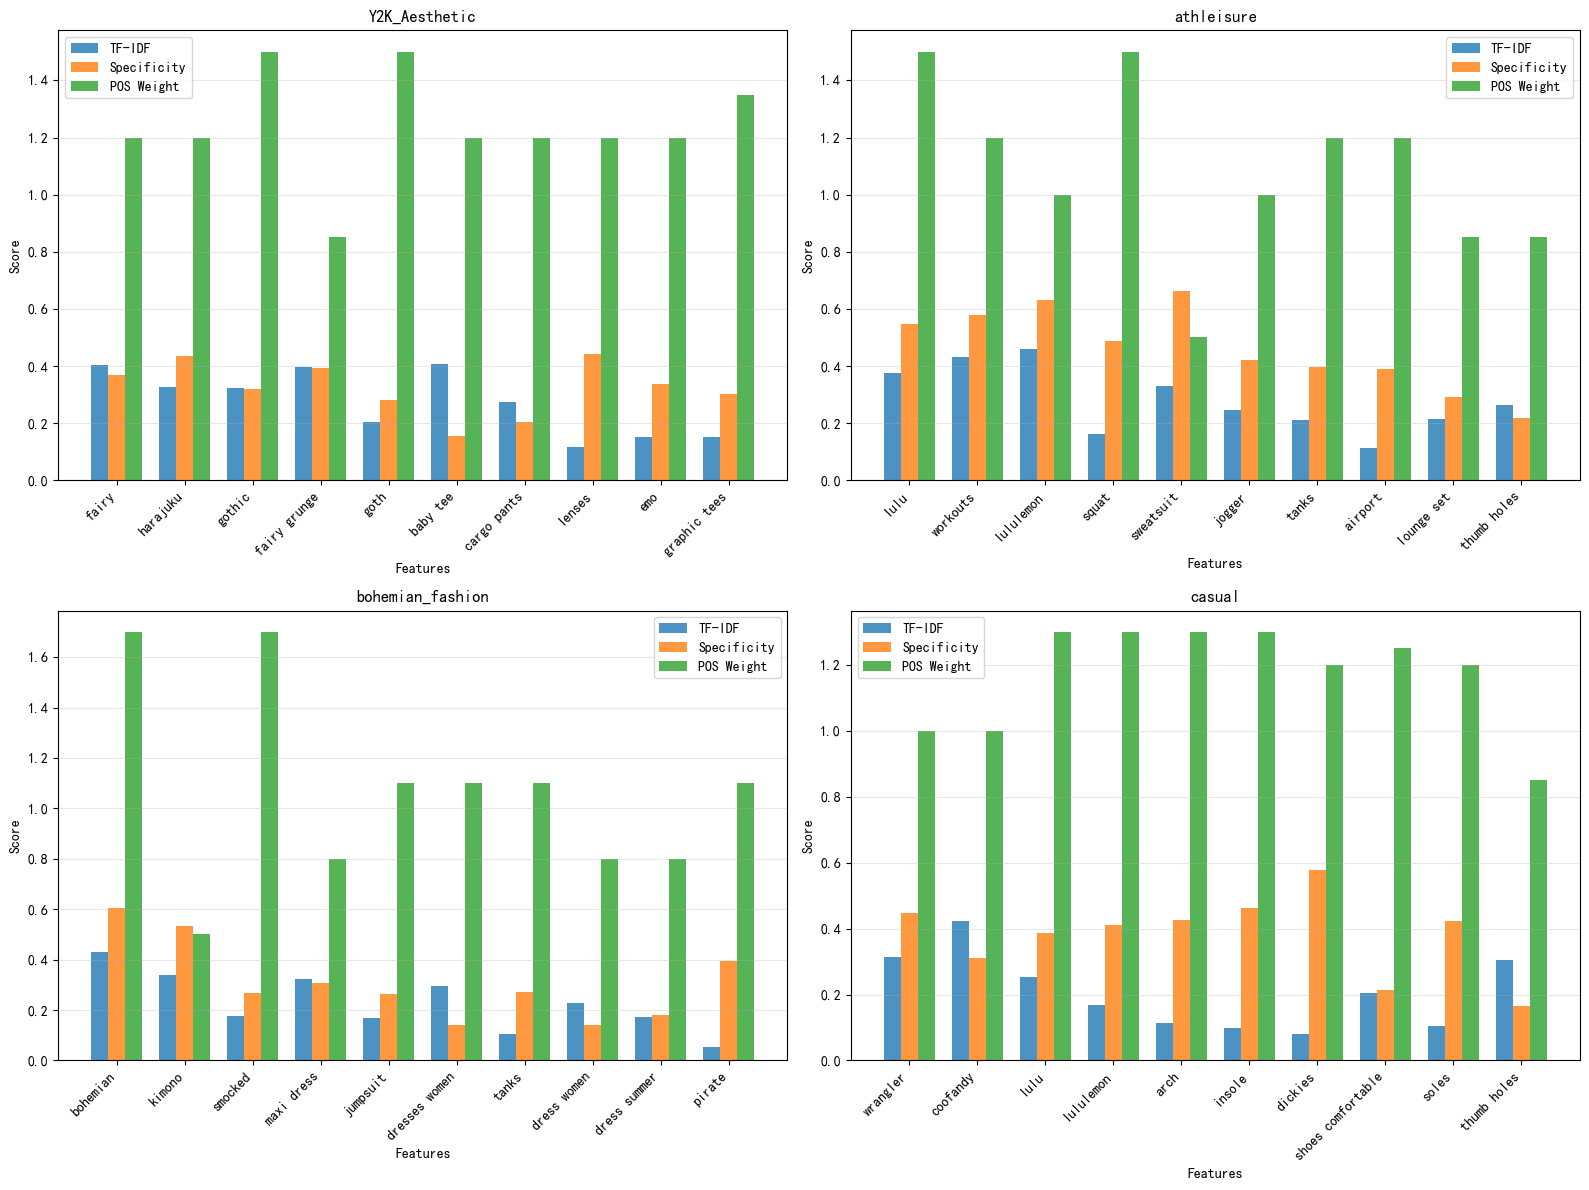

In [14]:
# 8.4 特征权重分解对比
if feature_details:
    plot_feature_weights_comparison(feature_details, top_n=10)

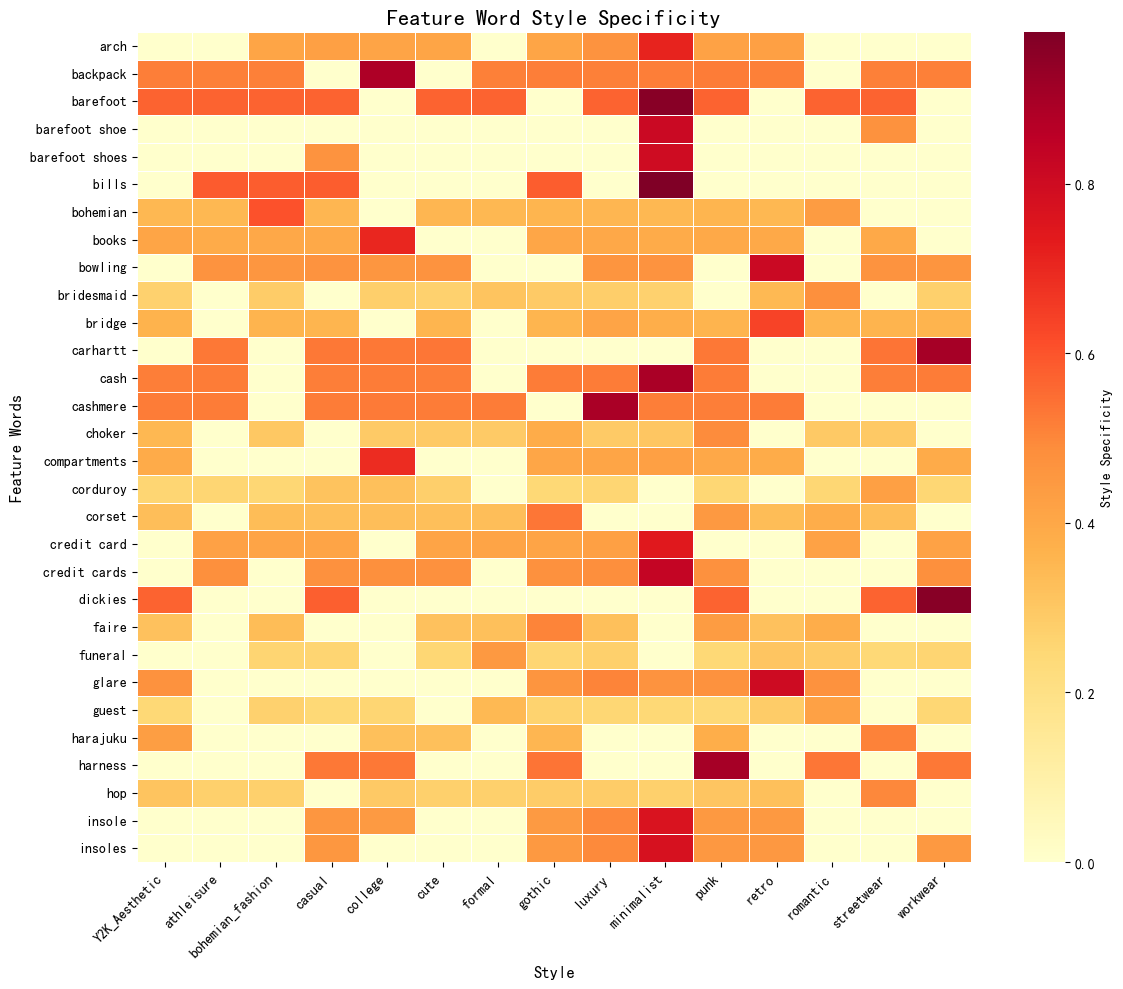

In [15]:
# 8.5 风格专属度热力图
if feature_details:
    plot_specificity_heatmap(feature_details, top_n=15)

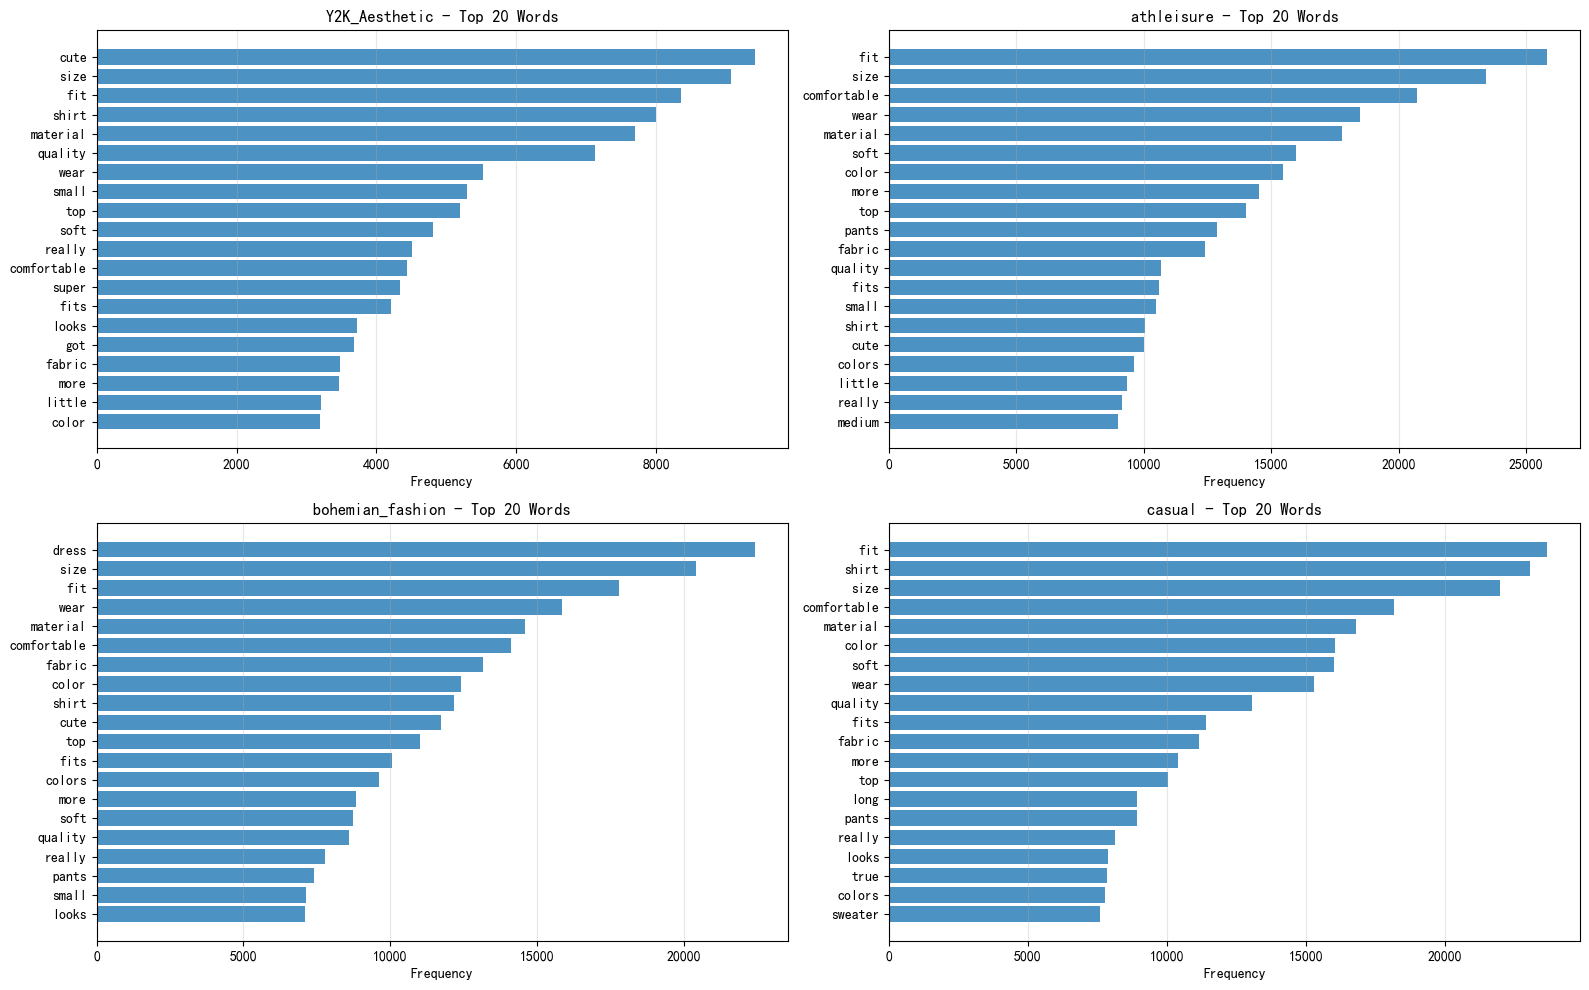

In [16]:
# 8.6 词频分布
if style_words:
    plot_word_frequency_distribution(style_words, top_n=20)

In [17]:
# 8.7 风格关系网络图（需要安装networkx）
if not similarity_df.empty:
    plot_style_network(similarity_df, threshold=0.3)

NetworkX not installed. Install with: pip install networkx


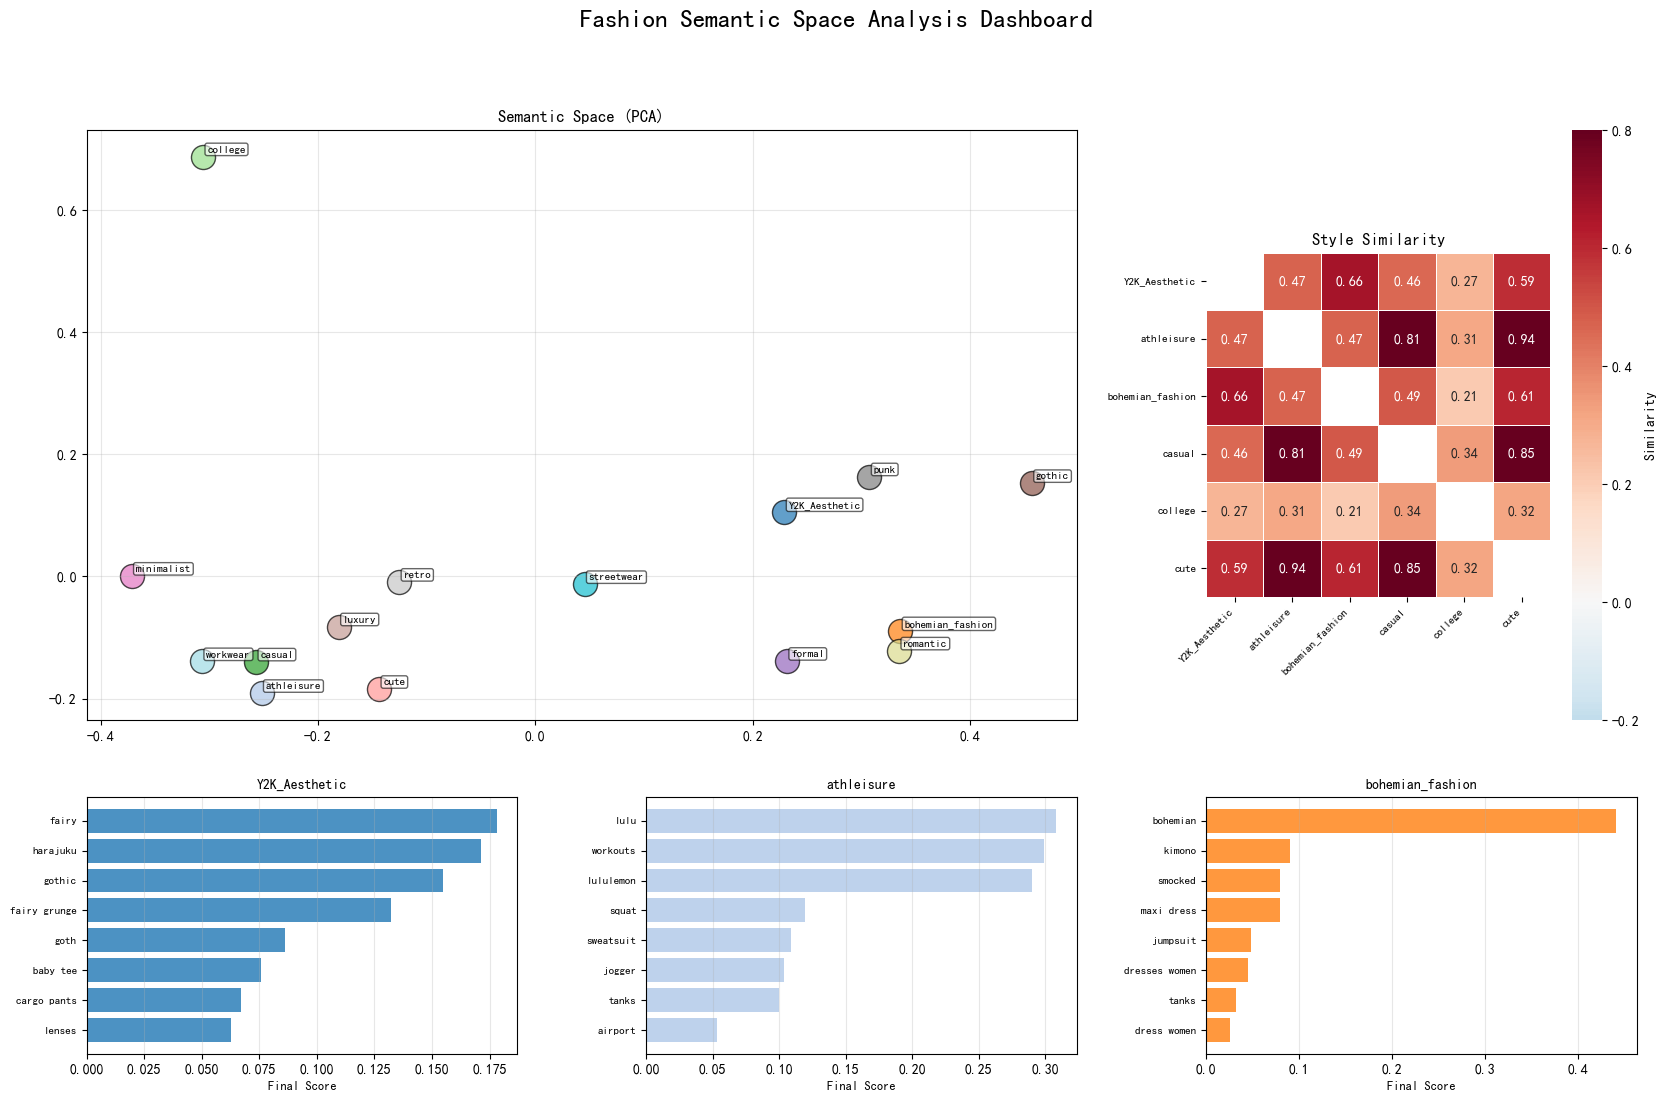

In [18]:
# 8.8 综合仪表板
if style_vectors and not similarity_df.empty and feature_details:
    create_analysis_dashboard(
        style_vectors, 
        similarity_df, 
        feature_details, 
        style_words
    )

## 9. 保存结果

In [19]:
# 保存所有结果
saved_path = save_all_results(
    details_df=details_df,
    reviews_df=reviews_df,
    style_words=style_words,
    style_words_pos=style_words_pos,
    style_features=style_features,
    feature_details=feature_details,
    word_embeddings=word_embeddings,
    style_vectors=style_vectors,
    similarity_df=similarity_df,
    base_path='./results'
)

print(f"\n✅ Results saved to: {saved_path}")
print(f"\nYou can find:")
print(f"  - analysis_report.txt (summary)")
print(f"  - feature_details.json (readable weights)")
print(f"  - similarity_matrix.csv (Excel compatible)")
print(f"  - All .pkl files (for reloading)")


Saving results to: results\20251019_031347

✅ All results saved to: results\20251019_031347

✅ Results saved to: results\20251019_031347

You can find:
  - analysis_report.txt (summary)
  - feature_details.json (readable weights)
  - similarity_matrix.csv (Excel compatible)
  - All .pkl files (for reloading)


## 10. 加载已保存的结果（可选）

In [20]:
# 如果要加载之前保存的结果
# loaded_results = load_results('./results/20240101_120000')  # 替换为实际路径
# 
# style_words = loaded_results['style_words']
# style_features = loaded_results['style_features']
# word_embeddings = loaded_results['word_embeddings']
# style_vectors = loaded_results['style_vectors']
# similarity_df = loaded_results['similarity_matrix']

## 11. 参数调优实验（可选）

In [21]:
# 实验：对比不同的专属度权重
# 修改 config/word_filters.json 中的 specificity_params
# 然后重新运行特征提取，对比结果

# 实验1: 只用信息熵
# config['specificity_params']['entropy_weight'] = 1.0
# config['specificity_params']['ratio_weight'] = 0.0

# 实验2: 只用占比
# config['specificity_params']['entropy_weight'] = 0.0
# config['specificity_params']['ratio_weight'] = 1.0

# 实验3: 调整词性权重
# config['pos_weights']['static']['ADJ'] = 2.0  # 提高形容词权重

---
## 分析完成！

**下一步建议：**
1. 查看 `results/` 文件夹中的 `analysis_report.txt`
2. 在Excel中打开 `similarity_matrix.csv` 查看详细数据
3. 查看 `feature_details.json` 了解权重分解
4. 调整 `config/word_filters.json` 中的参数重新运行
5. 根据结果优化噪声词和风格词词典